In [1]:
import sqlite3
from matplotlib.pyplot import imshow
from keras.models import load_model
import tqdm.notebook as tqdm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
import uuid
import json
from imageio import imread

from multiprocessing import Pool, Process

import pickle

import numpy as np

from FaceLoader import FaceLoader
from SocialProcessor import SocialProcessor

%matplotlib inline

Using TensorFlow backend.


In [2]:
conn = sqlite3.connect('scraped.db')
model_path = 'keras-facenet-master/model/keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
processor = SocialProcessor(conn, model)

In [4]:
base = list(processor.loadBase())
len(base)

3151

https://sun9-69.userapi.com/c633218/v633218978/8216/1KLw9Ktr6J8.jpg


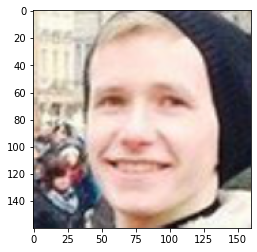

In [40]:
ind = 3000
plt.imshow(json.loads(base[ind][-2]))
link = base[ind][0]
print(link)

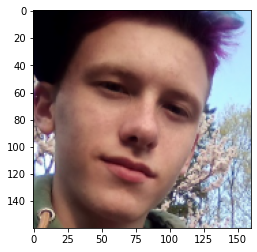

In [64]:
link = "https://sun9-30.userapi.com/c847124/v847124645/1f904a/AGLryOxc33A.jpg"
f = FaceLoader(link)
l = f.load_and_align_image(margin=20)
embedded = FaceLoader.calc_embs_static(model, images=l, batch_size=128)
ind = 0
imshow(l[ind])
e = embedded[ind]

In [65]:
res = processor.findMatches(e)

0.8927554535120698
https://sun9-63.userapi.com/c846416/v846416562/edd2c/Znt5VvQAi34.jpg
199106202


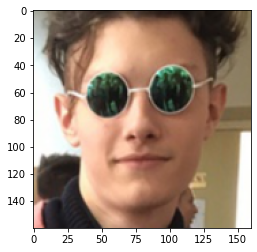

In [84]:
ind = -3
imshow(json.loads(res[ind][-3]))
print(res[ind][-1])
print(res[ind][0])
print(res[ind][3])

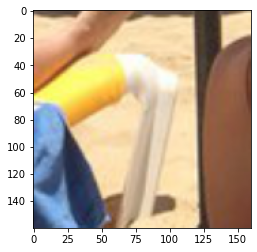

In [88]:
ind = -1
imshow(json.loads(base[ind][-2]))